# Libraries

In [123]:
import pickle
import pandas as pd
import spacy
from tqdm.notebook import tqdm
import numpy as np
import warnings

from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
import gensim

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns

# Import

In [151]:
N_TOPICS = 50
NOUNS_ONLY = False
N_ITERATIONS = 10000


if NOUNS_ONLY == False:
    NOUNS_ONLY = ""
if NOUNS_ONLY == True:
    NOUNS_ONLY = "_nouns"

In [152]:
lda = LdaMallet.load(f"Models/lda_{N_TOPICS}t_{N_ITERATIONS}i"+NOUNS_ONLY)

In [229]:
top_10

['Topic 0: art, hair, cut, color, design, haircut, artist, paint, piece, inspire',
 'Topic 1: love, family, friend, grateful, thankful, bless, hope, send, heart, pray',
 'Topic 2: life, covid19, pandemic, live, covid_19, coronaviru, stop, save, search, level',
 'Topic 3: night, find, house, leave, light, cool, room, move, spot, point',
 'Topic 4: face, challenge, bottle, hero, shield, soda, recycle, savetheworld, faceshield, SaveTheWorld',
 'Topic 5: case, coronavirus, death, covid-19, number, positive, state, bring, include, report',
 'Topic 6: socialdistance, summer, beach, losangele, sunset, day, water, fire, pool, wave',
 'Topic 7: year, plan, event, pandemic, cancel, wedding, big, happen, hold, suppose',
 'Topic 8: check, link, book, read, visit, appointment, write, website, bio, page',
 'Topic 9: hand, sanitizer, shop, clean, store, wash, buy, supply, stock, shopping',
 'Topic 10: stay, safe, hope, amp, healthy, covid19, ride, foot, remember, strong',
 'Topic 11: corona, 🔥, video

In [230]:
new_top_10 = []
for top in top_10:
    split = top.split(":")
    new_top_10.append([split[0], split[1]])
    

In [236]:
pd.DataFrame(new_top_10).to_csv("top_10_words.csv", index=False)

In [228]:
top_10 = []
for topic in range(N_TOPICS):
    words = lda.show_topic(topic, 10)
    topic_n_words = ', '.join([word[0] for word in words])
    temp_top_10 = 'Topic {}: {}'.format(str(topic), topic_n_words)
    top_10.append(temp_top_10)
topic_columns = ["topic_"+str(i) for i in range(N_TOPICS)]
top_10

['Topic 0: art, hair, cut, color, design, haircut, artist, paint, piece, inspire',
 'Topic 1: love, family, friend, grateful, thankful, bless, hope, send, heart, pray',
 'Topic 2: life, covid19, pandemic, live, covid_19, coronaviru, stop, save, search, level',
 'Topic 3: night, find, house, leave, light, cool, room, move, spot, point',
 'Topic 4: face, challenge, bottle, hero, shield, soda, recycle, savetheworld, faceshield, SaveTheWorld',
 'Topic 5: case, coronavirus, death, covid-19, number, positive, state, bring, include, report',
 'Topic 6: socialdistance, summer, beach, losangele, sunset, day, water, fire, pool, wave',
 'Topic 7: year, plan, event, pandemic, cancel, wedding, big, happen, hold, suppose',
 'Topic 8: check, link, book, read, visit, appointment, write, website, bio, page',
 'Topic 9: hand, sanitizer, shop, clean, store, wash, buy, supply, stock, shopping',
 'Topic 10: stay, safe, hope, amp, healthy, covid19, ride, foot, remember, strong',
 'Topic 11: corona, 🔥, video

In [237]:
len(df)

127128

In [154]:
df = pd.read_csv(f"Data/tweet_topic_{N_TOPICS}t_{N_ITERATIONS}i"+NOUNS_ONLY+".csv")
df.head()

date            id  \
0  2020-03-20  1.240728e+18   
1  2020-03-20  1.240728e+18   
2  2020-03-20  1.240728e+18   
3  2020-03-20  1.240729e+18   
4  2020-03-20  1.240729e+18   

                                               tweet  sentiment   topic_0  \
0  Many ask us how they can support us during all...   0.136364  0.017544   
1  We wish that ceramic coating protected us from...   0.000000  0.016393   
2  I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...   0.275000  0.017241   
3  Day 3.... Corona-0, QueRona-3! Workout complet...   0.000000  0.017241   
4  Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...  -0.137879  0.017544   

    topic_1   topic_2   topic_3   topic_4   topic_5  ...  topic_40  topic_41  \
0  0.017544  0.017544  0.017544  0.017544  0.017544  ...  0.017544  0.035088   
1  0.016393  0.016393  0.016393  0.016393  0.016393  ...  0.016393  0.016393   
2  0.017241  0.017241  0.034483  0.017241  0.017241  ...  0.017241  0.017241   
3  0.034483  0.017241  0.017241  0.017241  0.017241  ...  0.017241  0.017241   
4  0.017544  0.017544  0.017544  0.017544  0.017544  ...  0.017544  0.017544   

   topic_42  topic_43  topic_44  topic_45  topic_46  topic_47  topic_48  \
0  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544   
1  0.016393  0.016393  0.016393  0.016393  0.016393  0.016393  0.049180   
2  0.017241  0.017241  0.017241  0.017241  0.017241  0.017241  0.017241   
3  0.017241  0.017241  0.017241  0.017241  0.017241  0.051724  0.017241   
4  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544   

   topic_49  
0  0.017544  
1  0.016393  
2  0.017241  
3  0.017241  
4  0.017544  

[5 rows x 54 columns]

### Only select the first columns and topic proportions

In [155]:
topic_columns = ["topic_"+str(i) for i in range(N_TOPICS)]
columns = ['date', 'id', 'tweet', 'sentiment'] + topic_columns
df_topics = df[columns]
print(df.equals(df_topics)) # Just a test whether this indeed True
df_topics.head(2)


True


date            id  \
0  2020-03-20  1.240728e+18   
1  2020-03-20  1.240728e+18   

                                               tweet  sentiment   topic_0  \
0  Many ask us how they can support us during all...   0.136364  0.017544   
1  We wish that ceramic coating protected us from...   0.000000  0.016393   

    topic_1   topic_2   topic_3   topic_4   topic_5  ...  topic_40  topic_41  \
0  0.017544  0.017544  0.017544  0.017544  0.017544  ...  0.017544  0.035088   
1  0.016393  0.016393  0.016393  0.016393  0.016393  ...  0.016393  0.016393   

   topic_42  topic_43  topic_44  topic_45  topic_46  topic_47  topic_48  \
0  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544   
1  0.016393  0.016393  0.016393  0.016393  0.016393  0.016393  0.049180   

   topic_49  
0  0.017544  
1  0.016393  

[2 rows x 54 columns]

In [156]:
day_columns = ['date', 'sentiment'] + topic_columns

# Get topic sentiment
### SUM(topic_proportion * sentiment) / SUM(topic_proportion)

Multiply sentiment with topic proportions

In [157]:
for topic in topic_columns:
    df_topics[topic + "_times_sentiment"] = df_topics["sentiment"] * df_topics[topic]

# means per day
day_data_means = df_topics.groupby("date", sort=False).mean().reset_index()[day_columns]

# sums per day
day_data_sums = df_topics.groupby("date", sort=False).sum().reset_index() 

# SUM(topic_proportion * sentiment) / SUM(topic_proportion)
for topic in topic_columns:
    day_data_means[topic+"_sentiment"] = day_data_sums[topic+"_times_sentiment"]/day_data_sums[topic]
day_data_means.head()

date  sentiment   topic_0   topic_1   topic_2   topic_3   topic_4  \
0  2020-03-20   0.130727  0.019470  0.020019  0.019595  0.019808  0.017974   
1  2020-03-21   0.202211  0.019659  0.019753  0.020325  0.020233  0.018205   
2  2020-03-22   0.062982  0.020095  0.020516  0.019564  0.019642  0.017870   
3  2020-03-23   0.114953  0.019670  0.020088  0.019845  0.019255  0.017755   
4  2020-03-24   0.059909  0.019368  0.020603  0.020039  0.019670  0.018017   

    topic_5   topic_6   topic_7  ...  topic_40_sentiment  topic_41_sentiment  \
0  0.018903  0.020181  0.019110  ...            0.133337            0.120939   
1  0.019056  0.019953  0.018888  ...            0.207412            0.201368   
2  0.018510  0.020294  0.018996  ...            0.065150            0.064252   
3  0.018384  0.019023  0.018983  ...            0.110591            0.114830   
4  0.018563  0.019552  0.018843  ...            0.060529            0.050619   

   topic_42_sentiment  topic_43_sentiment  topic_44_sentiment  \
0            0.132542            0.135629            0.131537   
1            0.198488            0.206093            0.203352   
2            0.064464            0.063387            0.053612   
3            0.117255            0.117639            0.119033   
4            0.062757            0.057547            0.060448   

   topic_45_sentiment  topic_46_sentiment  topic_47_sentiment  \
0            0.121498            0.139501            0.132475   
1            0.191913            0.197932            0.205740   
2            0.056691            0.070124            0.060228   
3            0.118268            0.120358            0.116658   
4            0.071313            0.066309            0.049034   

   topic_48_sentiment  topic_49_sentiment  
0            0.130850            0.129014  
1            0.200891            0.198182  
2            0.059891            0.062830  
3            0.119955            0.111752  
4            0.059568            0.058235  

[5 rows x 102 columns]

# Correct by subtracting the lower bound and scale back to a sum of one

In [158]:
min_subtracted = df_topics[topic_columns].subtract(df_topics[topic_columns].min(axis=1), axis=0)
min_subtracted_sum = min_subtracted.sum(axis=1)
corrected_proportions = min_subtracted.divide(min_subtracted_sum, axis=0)

In [159]:
corrected_proportions.head()

topic_0  topic_1  topic_2  topic_3  topic_4  topic_5   topic_6  topic_7  \
0      0.0    0.000      0.0    0.000      0.0      0.0  0.000000      0.0   
1      0.0    0.000      0.0    0.000      0.0      0.0  0.090909      0.0   
2      0.0    0.000      0.0    0.125      0.0      0.0  0.000000      0.0   
3      0.0    0.125      0.0    0.000      0.0      0.0  0.000000      0.0   
4      0.0    0.000      0.0    0.000      0.0      0.0  0.000000      0.0   

    topic_8   topic_9  ...  topic_40  topic_41  topic_42  topic_43  topic_44  \
0  0.142857  0.000000  ...       0.0  0.142857       0.0       0.0       0.0   
1  0.000000  0.090909  ...       0.0  0.000000       0.0       0.0       0.0   
2  0.000000  0.375000  ...       0.0  0.000000       0.0       0.0       0.0   
3  0.000000  0.000000  ...       0.0  0.000000       0.0       0.0       0.0   
4  0.000000  0.000000  ...       0.0  0.000000       0.0       0.0       0.0   

   topic_45  topic_46  topic_47  topic_48  topic_49  
0       0.0       0.0      0.00  0.000000       0.0  
1       0.0       0.0      0.00  0.181818       0.0  
2       0.0       0.0      0.00  0.000000       0.0  
3       0.0       0.0      0.25  0.000000       0.0  
4       0.0       0.0      0.00  0.000000       0.0  

[5 rows x 50 columns]

# Final approach is making it binary

In [160]:
corrected_binary = (corrected_proportions>0).replace({True:1, False:0})
corrected_binary.head()

topic_0  topic_1  topic_2  topic_3  topic_4  topic_5  topic_6  topic_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        1        0   
2        0        0        0        1        0        0        0        0   
3        0        1        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   topic_8  topic_9  ...  topic_40  topic_41  topic_42  topic_43  topic_44  \
0        1        0  ...         0         1         0         0         0   
1        0        1  ...         0         0         0         0         0   
2        0        1  ...         0         0         0         0         0   
3        0        0  ...         0         0         0         0         0   
4        0        0  ...         0         0         0         0         0   

   topic_45  topic_46  topic_47  topic_48  topic_49  
0         0         0         0         0         0  
1         0         0         0         1         0  
2         0         0         0         0         0  
3         0         0         1         0         0  
4         0         0         0         0         0  

[5 rows x 50 columns]

In [161]:
i = 0

In [ ]:
# fig = plt.figure(figsize=(15,3))
# subplot1 = fig.add_subplot(311)
# subplot1.plot_date(date, topic_proportion, linestyle="solid", markersize=0)
# subplot2 = fig.add_subplot(312)
# subplot2.plot_date(date, topic_sentiment_mean, linestyle="solid", markersize=0, color="green")
# subplot3 = fig.add_subplot(313)
# subplot3.plot_date(date, topic_sentiment_std, linestyle="solid", markersize=0, color="red")
# fig.suptitle(top_10[int(TOPIC.split("_")[-1])])
# fig.tight_layout()
# plt.show()

Text(0.5, 1.0, 'topic distribution of a single tweet')

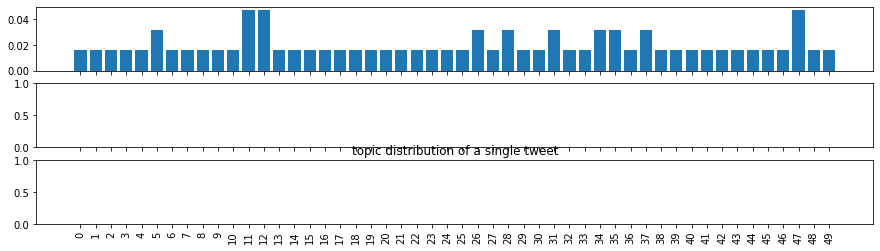

In [172]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,4))
axes[0]
axes[0].bar(topic_columns, df_topics[topic_columns].iloc[i])
plt.xticks(np.arange(N_TOPICS), np.arange(N_TOPICS), rotation="vertical")
plt.title("topic distribution of a single tweet")

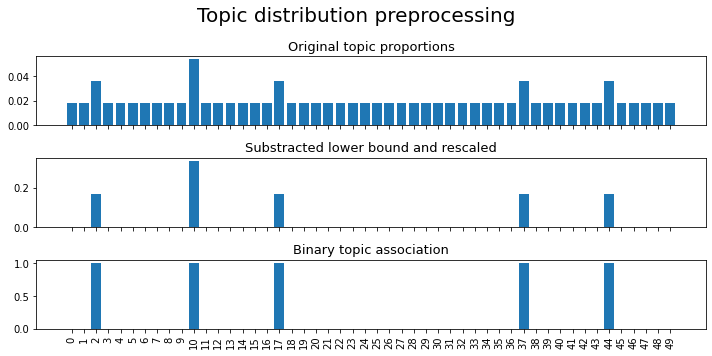

30


In [202]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,5), )
fig.suptitle("Topic distribution preprocessing", fontsize=20)
axes[0].set_title('Original topic proportions', fontsize=13)
axes[0].bar(topic_columns, df_topics[topic_columns].iloc[i])

axes[1].set_title('Substracted lower bound and rescaled', fontsize=13)
axes[1].bar(topic_columns, corrected_proportions[topic_columns].iloc[i])

axes[2].set_title('Binary topic association', fontsize=13)
axes[2].bar(topic_columns, corrected_binary[topic_columns].iloc[i])
axes[2].set_xticks(np.arange(N_TOPICS))
axes[2].set_xticklabels(np.arange(N_TOPICS), rotation="vertical")
plt.tight_layout()
plt.show()
print(i)
i+=1

# Get topic sentiment
This is much easier now, because we can just take the mean for the tweets that are 1 for the topic

In [163]:
df_topics_binary = pd.concat([df_topics[["date", "id", "tweet", "sentiment"]], corrected_binary], axis=1)
df_topics_binary.to_csv(f"Data/binary_topics_{N_TOPICS}t_{N_ITERATIONS}i{NOUNS_ONLY}.csv", index=False)
df_topics_binary.head()


date            id  \
0  2020-03-20  1.240728e+18   
1  2020-03-20  1.240728e+18   
2  2020-03-20  1.240728e+18   
3  2020-03-20  1.240729e+18   
4  2020-03-20  1.240729e+18   

                                               tweet  sentiment  topic_0  \
0  Many ask us how they can support us during all...   0.136364        0   
1  We wish that ceramic coating protected us from...   0.000000        0   
2  I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...   0.275000        0   
3  Day 3.... Corona-0, QueRona-3! Workout complet...   0.000000        0   
4  Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...  -0.137879        0   

   topic_1  topic_2  topic_3  topic_4  topic_5  ...  topic_40  topic_41  \
0        0        0        0        0        0  ...         0         1   
1        0        0        0        0        0  ...         0         0   
2        0        0        1        0        0  ...         0         0   
3        1        0        0        0        0  ...         0         0   
4        0        0        0        0        0  ...         0         0   

   topic_42  topic_43  topic_44  topic_45  topic_46  topic_47  topic_48  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         0         0   

   topic_49  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 54 columns]

# The code below is also moved to a separate Plotting ipynb

# Plot functions

In [44]:
def get_topic_proportion(data, topic, rolling=1):
    topic_proportion = data[["date", topic]].groupby("date", sort=False)[topic].mean()
    rolling_topic_proportion = topic_proportion.rolling(rolling).mean().reset_index(drop=True)
    return rolling_topic_proportion

In [78]:
def get_topic_sentiment_mean(data, topic, rolling=1):
    topic_sentiment_mean = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).mean()
    rolling_topic_sentiment_mean = topic_sentiment_mean.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_mean

In [79]:
def get_topic_sentiment_std(data, topic, rolling=1):
    topic_sentiment_std = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).std()
    rolling_topic_sentiment_std = topic_sentiment_std.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_std

In [80]:
def get_dates(data, topic):
    date = data[["date", topic]].groupby("date", sort=False)[topic].mean().reset_index()["date"]
    return date

In [88]:
TOPIC = "topic_0"
data = df_topics_binary
topic_proportion = get_topic_proportion(data, TOPIC, 10)
topic_sentiment_mean = get_topic_sentiment_mean(data, TOPIC, 10)
topic_sentiment_std = get_topic_sentiment_std(data, TOPIC, 10)
date = get_dates(data, TOPIC)

# Rolling mean plots

In [112]:
# fig = plt.figure(figsize=(15,3))
# subplot1 = fig.add_subplot(311)
# subplot1.plot_date(date, topic_proportion, linestyle="solid", markersize=0)
# subplot2 = fig.add_subplot(312)
# subplot2.plot_date(date, topic_sentiment_mean, linestyle="solid", markersize=0, color="green")
# subplot3 = fig.add_subplot(313)
# subplot3.plot_date(date, topic_sentiment_std, linestyle="solid", markersize=0, color="red")
# fig.suptitle(top_10[int(TOPIC.split("_")[-1])])
# fig.tight_layout()
# plt.show()

# FINAL PLOT FUNCTION

In [118]:
def plot_topic(data, topic, rolling=1, fontsize_y=8):
    topic_proportion = get_topic_proportion(data, topic, rolling)
    topic_sentiment_mean = get_topic_sentiment_mean(data, topic, rolling)
    topic_sentiment_std = get_topic_sentiment_std(data, topic, rolling)
    date = get_dates(data, topic)
    
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,4))
    fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=14)
    sns.lineplot(ax=axes[0], 
                 x=date, 
                 y=topic_proportion, 
                 sort=False,
                 ci=None)
    axes[0].set_ylabel("proportion", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[1], 
                 x=date, 
                 y=topic_sentiment_mean, 
                 sort=False,
                 color="green",
                 ci=None)
    axes[1].set_ylabel("sentiment mean", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[2], 
                 x=date, 
                 y=topic_sentiment_std, 
                 sort=False,
                 color="red",
                 ci=None)
    axes[2].set_ylabel("sentiment std", fontsize=fontsize_y, rotation=90)
    axes[2].set_xlabel(None)
    fig.autofmt_xdate()
    date_format = mpl_dates.DateFormatter("%b-%Y")
    axes[2].xaxis.set_major_formatter(date_format)
    plt.show()

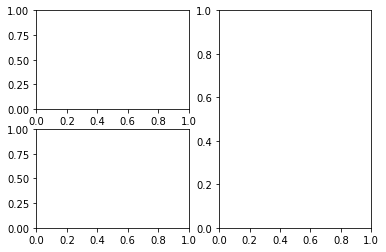

In [227]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
# fig2 = plt.figure()  # more figures are easily accessible
# fig3 = plt.figure()  # more figures are easily accessible

ax11 = fig1.add_subplot(221)  # add subplot into first position in a 2x2 grid (upper left)
ax12 = fig1.add_subplot(223, sharex=ax11)  # add to third position in 2x2 grid (lower left) and sharex with ax11
ax13 = fig1.add_subplot(122)  # add subplot to cover both upper and lower right, in a 2x2 grid. This is the same as the rightmost panel in a 1x2 grid.
# ax21 = fig2.add_subplot(211)  # add axes to the extra figures
# ax21 = fig2.add_subplot(212)  # add axes to the extra figures
# ax31 = fig3.add_subplot(111)  # add axes to the extra figures
plt.show()

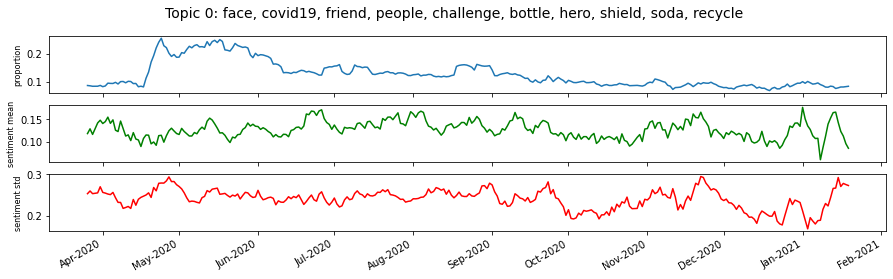

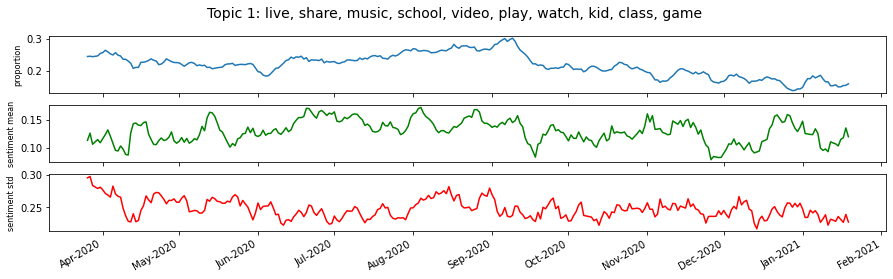

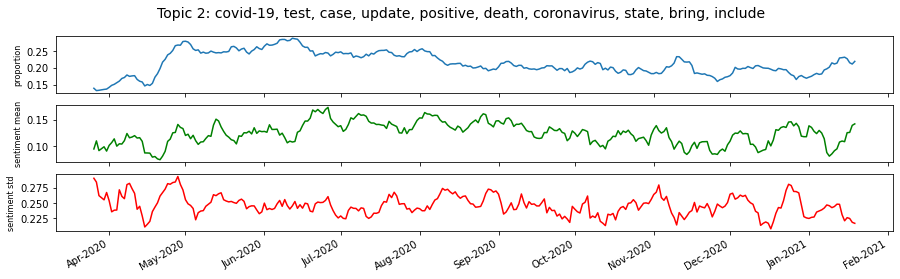

KeyboardInterrupt: 

In [119]:
for topic in topic_columns:
    plot_topic(data, topic, rolling=7)

# Other visualizations

In [108]:
# TOPIC = "topic_0"
# data = df_topics_binary
# topic_proportion = get_topic_proportion(data, TOPIC)
# topic_sentiment = get_topic_sentiment(data, TOPIC)
# date = get_dates(data, TOPIC)

In [109]:
# def plot_topic(data, topic, fontsize_y=8):
#     fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,4))
#     fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=14)
#     sns.lineplot(ax=axes[0], 
#                  data=data, 
#                  x="date", 
#                  y=topic, 
#                  sort=False,
#                  ci=None)
#     axes[0].set_ylabel("proportion", fontsize=fontsize_y, rotation=90)

#     sns.lineplot(ax=axes[1], 
#                  data=data[data[topic]==1][["date", "sentiment"]], 
#                  x="date", 
#                  y="sentiment", 
#                  sort=False,
#                  color="green",
#                  ci=None)
#     axes[1].set_ylabel("sentiment mean", fontsize=fontsize_y, rotation=90)
#     sns.lineplot(ax=axes[2], 
#                  data=data[data[topic]==1][["date", "sentiment"]], 
#                  x="date", 
#                  y="sentiment", 
#                  estimator="std",
#                  sort=False,
#                  color="red",
#                  ci=None)
#     axes[2].set_ylabel("sentiment std", fontsize=fontsize_y, rotation=90)
#     axes[2].set_xlabel(None)
#     fig.autofmt_xdate()
#     date_format = mpl_dates.DateFormatter("%b-%Y")
#     axes[2].xaxis.set_major_formatter(date_format)
#     plt.show()

In [110]:
# for topic in topic_columns:
#     plot_topic(data, topic)

In [52]:
# data = df_topics_binary

# fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,5))
# fig.suptitle(top_10[int(TOPIC.split("_")[-1])], fontsize=14)
# sns.lineplot(ax=axes[0], 
# #              data=data, 
#              x=data["date"], 
#              y=data[TOPIC], 
#              sort=False,
#              ci=None)
# axes[0].set(ylabel="topic proportion")
# axes[0].yaxis.get_label().set_fontsize(12)
# sns.lineplot(ax=axes[1], 
#              data=data[data[TOPIC]==1][["date", "sentiment"]], 
#              x="date", 
#              y="sentiment", 
#              sort=False,
#              color="orange")
# axes[1].set(ylabel="topic sentiment")
# axes[1].yaxis.get_label().set_fontsize(12)


# fig.autofmt_xdate()
# date_format = mpl_dates.DateFormatter("%b-%Y")
# axes[-1].xaxis.set_major_formatter(date_format)

# plt.show()

In [113]:
# def plot_topic(data, topic):
#     fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,5))
#     fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=14)
#     sns.lineplot(ax=axes[0], 
#                  data=data, 
#                  x="date", 
#                  y=topic, 
#                  sort=False,
#                  ci=None)
#     axes[0].set(ylabel="topic proportion")
#     axes[0].yaxis.get_label().set_fontsize(12)
#     sns.lineplot(ax=axes[1], 
#                  data=data[data[topic]==1][["date", "sentiment"]], 
#                  x="date", 
#                  y="sentiment", 
#                  sort=False,
#                  color="orange")
#     axes[1].set(ylabel="topic sentiment")
#     axes[1].yaxis.get_label().set_fontsize(12)
#     plt.show()

In [114]:
# for topic in topic_columns[:2]:
#     plot_topic(data, topic)

In [115]:
# def plot_topic(data, topic):
#     fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,5))
#     fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=14)
#     sns.lineplot(ax=axes[0], 
#                  data=data, 
#                  x="date", 
#                  y=topic, 
#                  sort=False,
#                  ci=None)
#     axes[0].set(ylabel="topic proportion")
#     axes[0].yaxis.get_label().set_fontsize(12)
#     sns.lineplot(ax=axes[1], 
#                  data=data[data[topic]==1][["date", "sentiment"]], 
#                  x="date", 
#                  y="sentiment", 
#                  sort=False,
#                  color="green",
#                  ci=None)
#     sns.lineplot(ax=axes[1], 
#                  data=data[data[topic]==1][["date", "sentiment"]], 
#                  x="date", 
#                  y="sentiment", 
#                  estimator="std",
#                  sort=False,
#                  color="red",
#                  ci=None)
#     axes[1].set(ylabel="topic sentiment")
#     axes[1].yaxis.get_label().set_fontsize(12)
#     plt.show()

In [116]:
# for topic in topic_columns[:2]:
#     plot_topic(data, topic)

In [88]:
# def plot_topic(data, topic):
#     fig, axes = plt.subplots(1, 1, sharex=True, figsize=(15,5))
#     fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=14)
#     sns.lineplot(ax=axes, 
#                  data=data, 
#                  x="date", 
#                  y=topic, 
#                  sort=False,
#                  ci=None,
#                  label="topic proportion")
#     axes.set(ylabel="topic proportion")
#     axes.yaxis.get_label().set_fontsize(12)
#     sns.lineplot(ax=axes, 
#                  data=data[data[topic]==1][["date", "sentiment"]], 
#                  x="date", 
#                  y="sentiment", 
#                  sort=False,
#                  color="green",
#                  ci=None,
#                  label="sentiment mean")
#     sns.lineplot(ax=axes, 
#                  data=data[data[topic]==1][["date", "sentiment"]], 
#                  x="date", 
#                  y="sentiment", 
#                  estimator="std",
#                  sort=False,
#                  color="red",
#                  ci=None,
#                  label="sentiment std")
#     axes.set(ylabel="topic sentiment")
#     axes.yaxis.get_label().set_fontsize(12)
#     plt.show()

In [116]:
# for topic in topic_columns[:2]:
#     plot_topic(data, topic)